## Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import yfinance as yf
from yahoofinancials import YahooFinancials
from pandas_datareader import data

## Data

In [3]:
bvsp_raw_data = yf.download('^BVSP', start='2016-06-12', end='2022-06-12', progress=False) # ibovespa
bsesn_raw_data = yf.download('^BSESN', start='2016-06-12', end='2022-06-12', progress=False) # S&P BSE SENSEX
ixic_raw_data = yf.download('^IXIC', start='2016-06-12', end='2022-06-12', progress=False) # Nasdaq
dji_raw_data = yf.download('^DJI', start='2016-06-12', end='2022-06-12', progress=False) # Dow Jones Industrial Average

In [4]:
bvsp_raw_data.keys()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
round(bvsp_raw_data.describe(), 2)

,Open,High,Low,Close,Adj Close,Volume
count,1486.00,1486.00,1486.00,1486.00,1486.00,1486.00
mean,91224.12,92098.08,90370.19,91260.34,91260.34,6361615.55
std,20719.34,20816.45,20570.22,20693.58,20693.58,3719589.01
min,48649.00,49412.00,48067.00,48648.00,48648.00,0.00
25%,74064.50,74784.00,73066.25,74089.75,74089.75,3486300.00
50%,94647.00,95938.50,93781.00,94651.50,94651.50,4881850.00
75%,108313.75,109012.50,107312.00,108228.50,108228.50,9232900.00
max,130776.00,131190.00,129526.00,130776.00,130776.00,21768700.00


In [6]:
# You can use unadjusted closing prices to calculate returns, but adjusted closing prices save you some time and effort. 
# Adjusted prices are already adjusted for stock dividends, cash dividends and splits, 
#                                                                      which creates a more accurate return calculation.

bvsp_adj_close = bvsp_raw_data['Adj Close']
bsesn_adj_close = bsesn_raw_data['Adj Close']
ixic_adj_close = ixic_raw_data['Adj Close']
dji_adj_close = dji_raw_data['Adj Close']

rollingseries_bvsp_adj_close = bvsp_adj_close.rolling(window=7)
rollingmean_bvsp_adj_close = rollingseries_bvsp_adj_close.mean() #mean
#print(rollingmean.head(10))
rollingseries_bsesn_adj_close = bsesn_adj_close.rolling(window=7)
rollingmean_bsesn_adj_close = rollingseries_bsesn_adj_close.mean()

rollingseries_ixic_adj_close = ixic_adj_close.rolling(window=7)
rollingmean_ixic_adj_close = rollingseries_ixic_adj_close.mean()

rollingseries_dji_adj_close = dji_adj_close.rolling(window=7)
rollingmean_dji_adj_close = rollingseries_dji_adj_close.mean()



# Let's create a DataFrame that will contain data about the adjusted closing # prices for the selected cryptocurrencies in the given time period.
Close_Df = pd.DataFrame(columns=['bvsp','bsesn','ixic','dji'])
Close_Df['bvsp'] = round(bvsp_adj_close,2)
Close_Df['bsesn'] = round(bsesn_adj_close,2)
Close_Df['ixic'] = round(ixic_adj_close,2)
Close_Df['dji'] = round(dji_adj_close,2)

Close_Df


,bvsp,bsesn,ixic,dji
Date,,,,
2016-06-13,49661.0,26396.77,4848.44,17732.48
2016-06-14,48648.0,26395.71,4843.55,17674.82
2016-06-15,48915.0,26726.34,4834.93,17640.17
2016-06-16,49412.0,26525.46,4844.92,17733.10
2016-06-17,49534.0,26625.91,4800.34,17675.16
...,...,...,...,...
2022-06-06,110186.0,55675.32,12061.37,32915.78
2022-06-07,110070.0,55107.34,12175.23,33180.14
2022-06-08,108368.0,54892.49,12086.27,32910.90


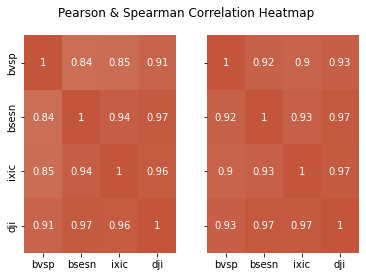

In [7]:
# Heatmap for Pearson and Spearman Correlation for Close Values between the Market Indices
close_corr_pearson = Close_Df.corr(method ='pearson')
close_corr_spearman = Close_Df.corr(method ='spearman')

cmap = sns.diverging_palette(230, 20, as_cmap=True)

f,(ax1,ax2) = plt.subplots(1,2,sharey=True)
f.suptitle('Pearson & Spearman Correlation Heatmap')

# Pearson
g1 = sns.heatmap(close_corr_pearson,cmap=cmap,cbar=False,ax=ax1, annot=True, vmin=-1, vmax=1)
g1.set_ylabel('')
g1.set_xlabel('')

# Spearman
g2 = sns.heatmap(close_corr_spearman,cmap=cmap,cbar=False,ax=ax2, annot=True, vmin=-1, vmax=1)
g2.set_ylabel('')
g2.set_xlabel('')

plt.show()

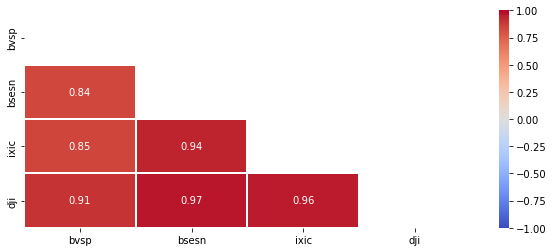

In [8]:
# All variables
plt.figure(5, figsize=(10, 4))

mask = np.triu(np.ones_like(close_corr_pearson, dtype=bool))

ax = sns.heatmap(close_corr_pearson, mask=mask,
                 xticklabels=close_corr_pearson.columns,
                 yticklabels=close_corr_pearson.columns,
                 annot=True, linewidths=.2,
                 cmap='coolwarm',
                 vmin=-1, vmax=1)

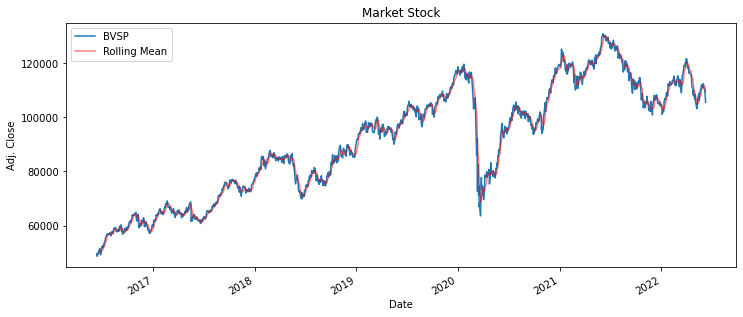

In [9]:
plt.figure(figsize=(12, 5))

bvsp_adj_close.plot(label = 'BVSP')
rollingmean_bvsp_adj_close.plot(color= 'red', alpha= 0.5, label = 'Rolling Mean')

#bsesn_adj_close.plot(label = 'BSESN')
#rollingmean_bsesn_adj_close.plot(color= 'red', alpha= 0.5, label = 'Rolling Mean')

#ixic_adj_close.plot(label = 'IXIC')
#rollingmean_ixic_adj_close.plot(color= 'red', alpha= 0.5, label = 'Rolling Mean')

#dji_adj_close.plot(label = 'DJI')
#rollingmean_dji_adj_close.plot(color= 'red', alpha= 0.5, label = 'Rolling Mean')


plt.legend(loc = 'best')
plt.title('Market Stock')
plt.ylabel('Adj. Close')
plt.show()

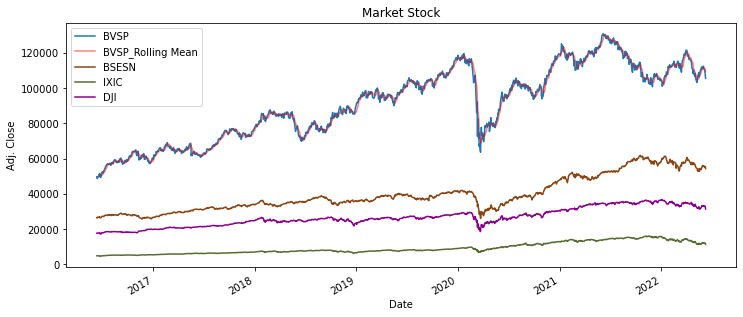

In [10]:
plt.figure(figsize=(12, 5))

bvsp_adj_close.plot(label = 'BVSP')
rollingmean_bvsp_adj_close.plot(alpha= 0.5, label = 'BVSP_Rolling Mean', color='r')
bsesn_adj_close.plot(label = 'BSESN', color='#8B4513')
# rollingmean_bsesn_adj_close.plot(alpha= 0.5, label = 'BSESN_Rolling Mean', color='#4B0082')
ixic_adj_close.plot(label = 'IXIC', color='#556B2F')
# rollingmean_ixic_adj_close.plot(alpha= 0.5, label = 'IXIC_Rolling Mean', color='green')
dji_adj_close.plot(label = 'DJI', color='#8B008B')
# rollingmean_dji_adj_close.plot(alpha= 0.5, label = 'DJI_Rolling Mean', color='r')

plt.legend(loc = 'best')
plt.title('Market Stock')
plt.ylabel('Adj. Close')
plt.show()

c:\Users\Pichau\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\Pichau\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
c:\Users\Pichau\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


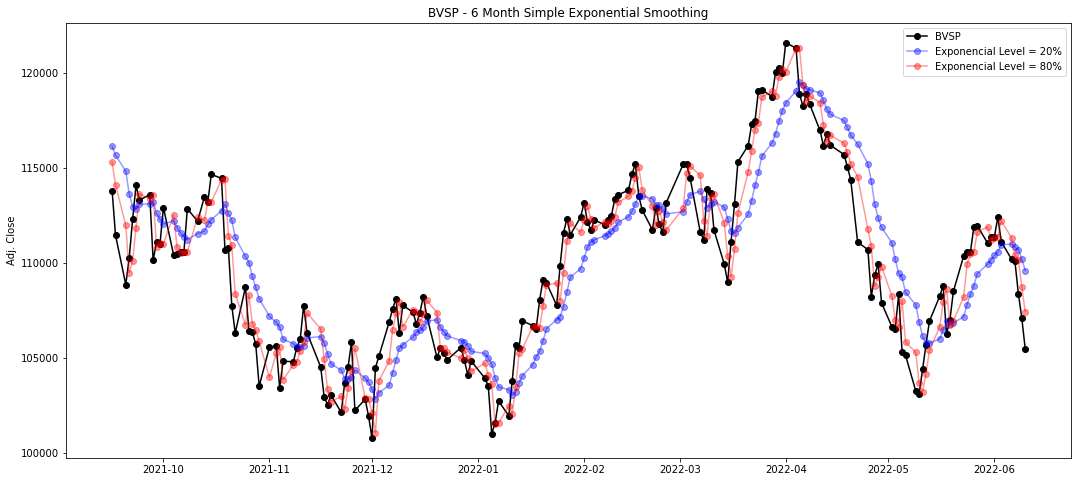

In [11]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

fit1 = SimpleExpSmoothing(bvsp_adj_close).fit(smoothing_level=0.2, optimized=False)
fit2 = SimpleExpSmoothing(bvsp_adj_close).fit(smoothing_level=0.8, optimized=False)
plt.figure(figsize=(18, 8))
plt.plot(bvsp_adj_close[-183:], marker='o', color="black", label = 'BVSP')
plt.plot(fit1.fittedvalues[-183:], marker="o", color="b", label = 'Exponencial Level = 20%', alpha= 0.40)
plt.plot(fit2.fittedvalues[-183:], marker="o", color="r", label = 'Exponencial Level = 80%', alpha= 0.40)

plt.legend(loc = 'best')
plt.title('BVSP - 6 Month Simple Exponential Smoothing')
plt.ylabel('Adj. Close')
plt.show()

## Decomposition and stationarity check practicals

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose, seasonal_decompose

# Additive Decomposition
add_result = seasonal_decompose(bvsp_adj_close, model='additive',period=1)
# Multiplicative Decomposition 
mul_result = seasonal_decompose(bvsp_adj_close, model='multiplicative',period=1)

new_df_add = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
new_df_add.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_add

,seasoanilty,trend,residual,actual_values
Date,,,,
2016-06-13,0.0,49661.0,0.0,49661.0
2016-06-14,0.0,48648.0,0.0,48648.0
2016-06-15,0.0,48915.0,0.0,48915.0
2016-06-16,0.0,49412.0,0.0,49412.0
2016-06-17,0.0,49534.0,0.0,49534.0
...,...,...,...,...
2022-06-06,0.0,110186.0,0.0,110186.0
2022-06-07,0.0,110070.0,0.0,110070.0
2022-06-08,0.0,108368.0,0.0,108368.0


<Figure size 1440x1008 with 0 Axes>

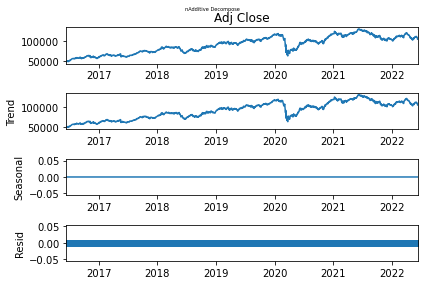

In [13]:
plt.figure(figsize=(20,14))
add_result.plot().suptitle('nAdditive Decompose', fontsize=5)
plt.show()

## ADfuller test for stationary

In [14]:
from statsmodels.tsa.stattools import adfuller

adfuller_result = adfuller(bvsp_adj_close, autolag='AIC')
print(f'ADF Statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')
for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.0523312768843374
p-value: 0.2641090724093161
Critial Values:
   1%, -3.434785139702456
Critial Values:
   5%, -2.863498825305098
Critial Values:
   10%, -2.5678128583805213


## UNDER CONSTRUCTION...

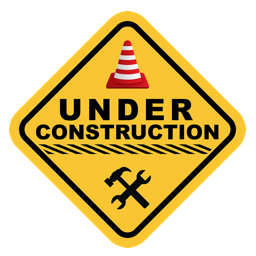

In [17]:
from IPython import display
display.Image("https://ps.w.org/easy-under-construction/assets/icon-256x256.png")